<a href="https://colab.research.google.com/github/jessicamila05/machine_learning_classificacao_imagens/blob/main/classificacao_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [ ]:
import tensorflow
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from google.colab import drive



**Carregando os dados**

In [ ]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


 **Exploração dos dados**

In [ ]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()


9

 **Exibição dos dados**

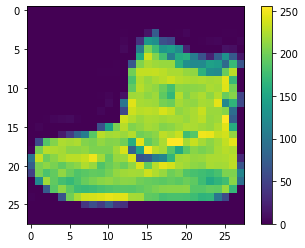

In [ ]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis','Bolsa', 'bota']

'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''

plt.imshow(imagens_treino[0])
plt.colorbar()


**Normalizando as imagens** 

In [ ]:
#normalização...
imagens_treino = imagens_treino/float(255) #ou só 255.0



**Criando, compilando, treinando e normalizando o modelo**

In [ ]:
#Criando o Modelo...
modelo = keras.Sequential([
                           keras.layers.Flatten(input_shape= (28, 28)), #entrada...
                           keras.layers.Dense(256, activation=tensorflow.nn.relu), #processamento...
                           keras.layers.Dropout(0.2), #normalizando o modelo com droupout...
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax), #saida...                          
])

adam = keras.optimizers.Adam(lr=0.002)

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'), 
             keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5', monitor='val_loss', save_best_only=True)]

#Compilando o modelo...
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy']) #entropia categorica cruzada esparsas

#Treinando o modelo... Normalizando...
historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       batch_size=480, epochs=5, 
                       validation_split=0.2, 
                       callbacks=callbacks) 

Epoch 1/5
100/100 [==============================] - 2s 17ms/step - loss: 0.9819 - accuracy: 0.6656 - val_loss: 0.4933 - val_accuracy: 0.8289
Epoch 2/5
100/100 [==============================] - 2s 16ms/step - loss: 0.4840 - accuracy: 0.8342 - val_loss: 0.4241 - val_accuracy: 0.8532
Epoch 3/5
100/100 [==============================] - 1s 15ms/step - loss: 0.4193 - accuracy: 0.8532 - val_loss: 0.3913 - val_accuracy: 0.8637
Epoch 4/5
100/100 [==============================] - 2s 15ms/step - loss: 0.3865 - accuracy: 0.8630 - val_loss: 0.3707 - val_accuracy: 0.8682
Epoch 5/5
100/100 [==============================] - 2s 15ms/step - loss: 0.3660 - accuracy: 0.8688 - val_loss: 0.3590 - val_accuracy: 0.8698


**Sumário do modelo**

In [ ]:
sumario_do_modelo = modelo.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


**Pesos da camada dense**

In [ ]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[-0.06620776, -0.03401868, -0.0917071 , ...,  0.15070769,
        -0.00105432,  0.08941542],
       [-0.06615929, -0.00566567,  0.05610766, ..., -0.05073429,
         0.10894001,  0.0169579 ],
       [-0.02741842, -0.068673  ,  0.00258863, ...,  0.07887463,
        -0.01833941, -0.16546531],
       ...,
       [-0.02268327,  0.03648584,  0.05587923, ..., -0.15286152,
         0.05040529,  0.02853442],
       [-0.04201943, -0.0395864 , -0.11398955, ..., -0.06262744,
         0.16818164,  0.02956215],
       [ 0.04314458, -0.03218512, -0.03055444, ..., -0.09854826,
         0.05061342, -0.24924088]], dtype=float32)

In [ ]:
pesos_camada_dense.shape
pesos_camada_dense_zerados =np.zeros((784, 256))

pesos_camada_dense_aleatorios =np.random.rand(784, 256)
'''
#rondando os pesos zerados...
modelo.layers[1].set_weights([pesos_camada_dense_zerados,vieses_camada_dense])
'''

#rodando pesos aleatorios...
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios,vieses_camada_dense])
modelo.layers[1].get_weights()


[array([[0.1938858 , 0.7940019 , 0.9796088 , ..., 0.5977174 , 0.9293361 ,
         0.3707212 ],
        [0.41001654, 0.2907723 , 0.8041293 , ..., 0.31776074, 0.3163986 ,
         0.624766  ],
        [0.79511005, 0.7474248 , 0.37787652, ..., 0.5128052 , 0.1760237 ,
         0.37163228],
        ...,
        [0.5314986 , 0.51124203, 0.56574565, ..., 0.60426575, 0.88284   ,
         0.01149746],
        [0.36825284, 0.1705303 , 0.9573014 , ..., 0.7125551 , 0.33983865,
         0.14036283],
        [0.29922915, 0.13353814, 0.27624786, ..., 0.29636484, 0.23282668,
         0.25682697]], dtype=float32),
 array([ 0.05490521, -0.00726257,  0.20382707,  0.46182394, -0.09625323,
         0.26575294,  0.22509645,  0.05258639, -0.05661117,  0.37709796,
         0.05587661,  0.08114166, -0.06563804, -0.09874365,  0.27212882,
        -0.28036004, -0.04780727,  0.33459416, -0.02479019,  0.21360172,
         0.33808392,  0.33868524, -0.36615428, -0.13085178, -0.01823672,
        -0.1794874 ,  0.03375

In [ ]:


#Compilando o modelo...
modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy',
               metrics=['accuracy']) #entropia categorica cruzada esparsa

#Treinando o modelo... Normalizando...
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2) 

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3178 - accuracy: 0.0980 - val_loss: 2.3032 - val_accuracy: 0.0957
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0968 - val_loss: 2.3029 - val_accuracy: 0.0995
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.1004 - val_loss: 2.3029 - val_accuracy: 0.1005
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3029 - accuracy: 0.1010 - val_loss: 2.3031 - val_accuracy: 0.1003
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.1001 - val_loss: 2.3035 - val_accuracy: 0.0957


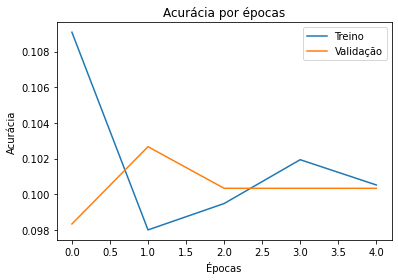

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

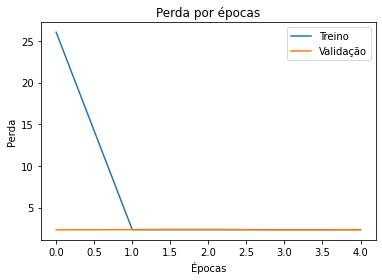

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])

In [ ]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None

**Vieses da camada dense**

In [ ]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense


array([-4.184429 , -3.7902668, -3.7135534, -3.2522342, -4.518854 ,
       -3.4502413, -3.7495387, -5.2795186, -4.7307944, -3.7244184,
       -5.4841003, -5.472205 , -5.2257032, -4.169401 , -3.2349315,
       -5.4828553, -4.6338887, -3.1571307, -4.2414236, -4.445705 ,
       -3.8801763, -3.7689316, -5.4742155, -4.8090587, -4.9259424,
       -5.3387628, -3.8227367, -3.3158543, -2.674158 , -5.1366916,
       -5.0327206, -3.29251  , -4.0311155, -4.7153215, -3.891433 ,
       -2.933189 , -5.03785  , -4.1539226, -4.9959726, -4.777284 ,
       -4.6662183, -3.9245334, -3.6495457, -3.7380636, -4.7459817,
       -3.9605656, -2.9659133, -5.147889 , -3.2504368, -3.708345 ,
       -3.6904874, -3.5214553, -4.1052575, -4.827238 , -4.613441 ,
       -3.7317605, -3.6965363, -4.098245 , -4.41284  , -4.584413 ,
       -4.05366  , -3.0697856, -4.607033 , -3.7682722, -4.2511506,
       -4.825876 , -3.4945955, -4.3961515, -4.7553887, -7.662698 ,
       -4.8516083, -4.8682265, -5.0418506, -4.7449837, -4.4018

In [ ]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios,vieses_camada_dense_zerados])

**Salvando e carregando o modelo treinado**

In [ ]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

**Visualizando as acurácias de treino e validação por época **

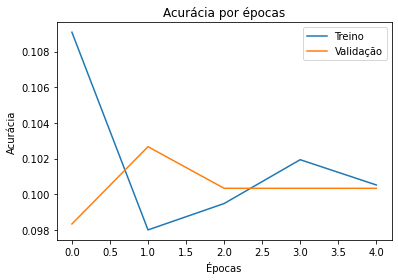

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

**Visualizando as perdas de treino e validação por época** 

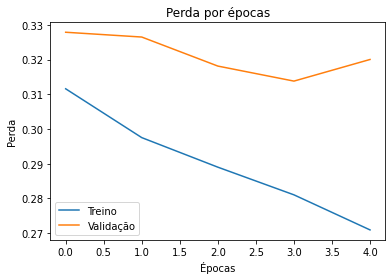

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])

**Testando o modelo e o modelo Salvo**

In [ ]:
testes = modelo.predict(imagens_teste)
print('Resultado teste:', np.argmax(testes[0]))
print('Número da Imagem teste:', identificacoes_teste[0])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[0]))
print('Número da Imagem teste:', identificacoes_teste[0])

Resultado teste: 9
Número da Imagem teste: 9
Resultado teste modelo salvo: 9
Número da Imagem teste: 9


**Aliando o modelo** 

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 266081.9062 - accuracy: 0.1000
Perda do teste: 266081.90625
Acurácia do teste: 0.10000000149011612


In [ ]:
#Importando o Drive...

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')